# Task 1: Exploratory Data Analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train_imputed.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82171 entries, 0 to 82170
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       82171 non-null  object 
 1   player_id                82171 non-null  object 
 2   kill_death_ratio         82171 non-null  float64
 3   headshot_percentage      82171 non-null  float64
 4   win_rate                 82171 non-null  float64
 5   accuracy_score           82171 non-null  float64
 6   kill_consistency         82171 non-null  float64
 7   reaction_time_ms         82171 non-null  float64
 8   account_age_days         82171 non-null  float64
 9   level                    82171 non-null  float64
 10  level_progression_speed  82171 non-null  float64
 11  friend_network_size      82171 non-null  float64
 12  reports_received         82171 non-null  float64
 13  device_changes_count     82171 non-null  float64
 14  input_consistency_scor

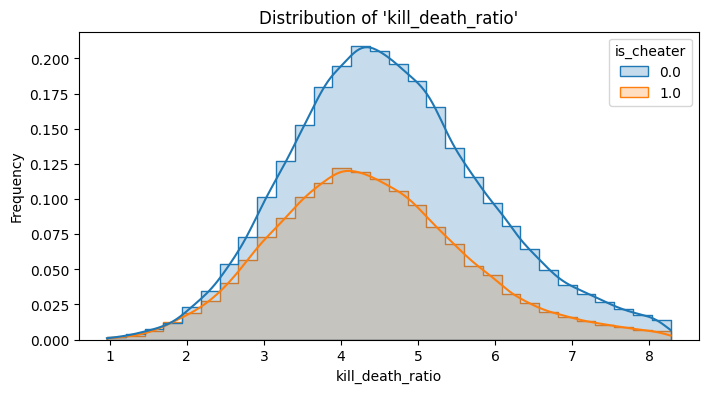

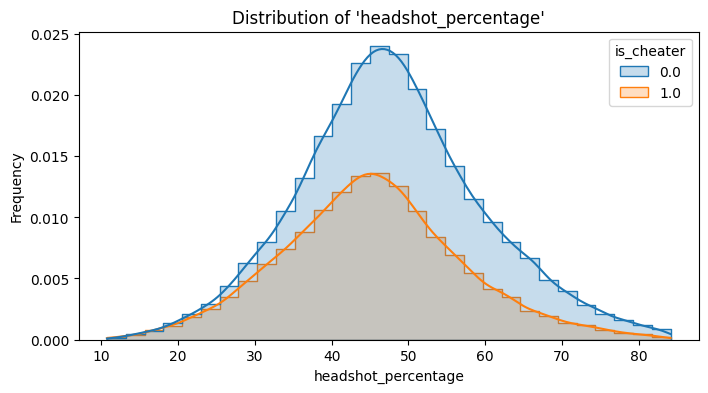

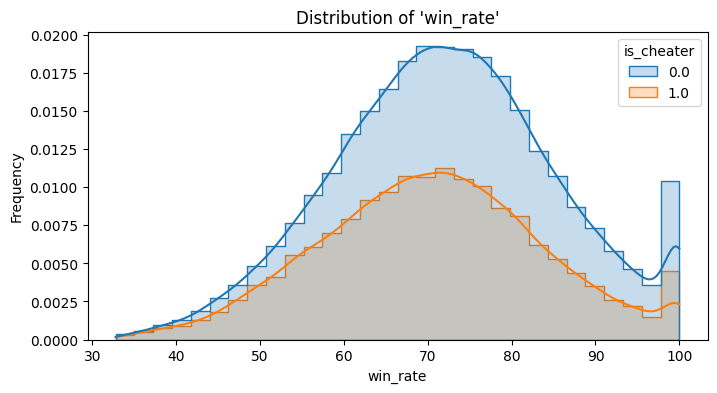

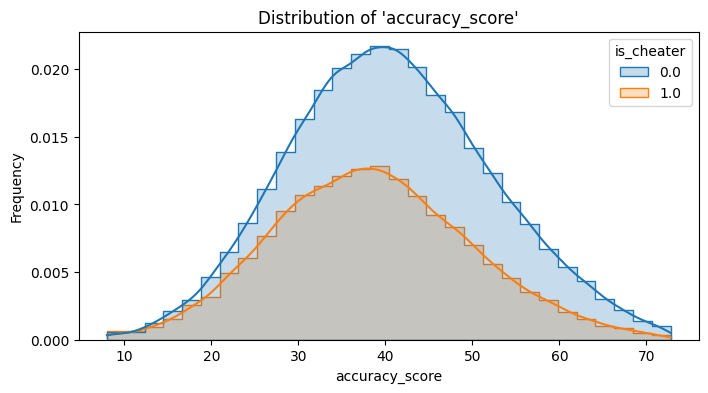

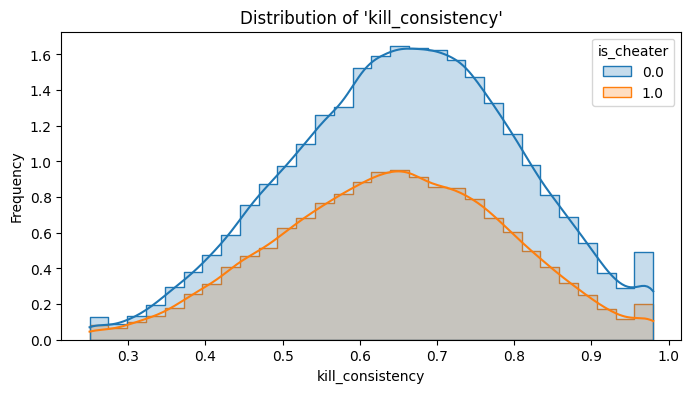

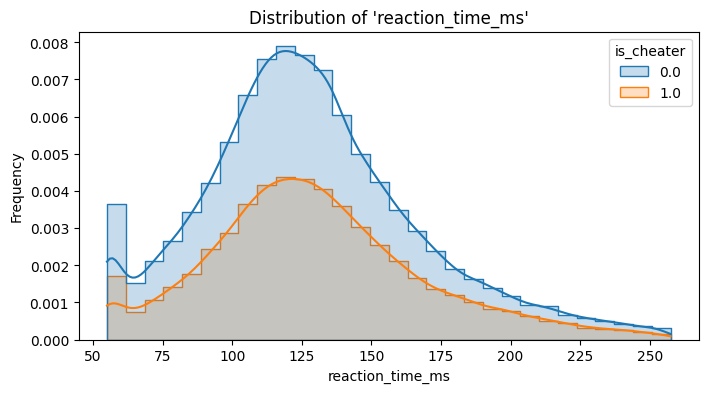

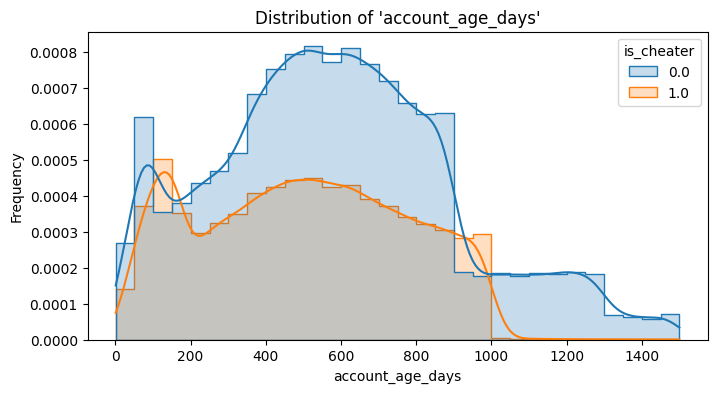

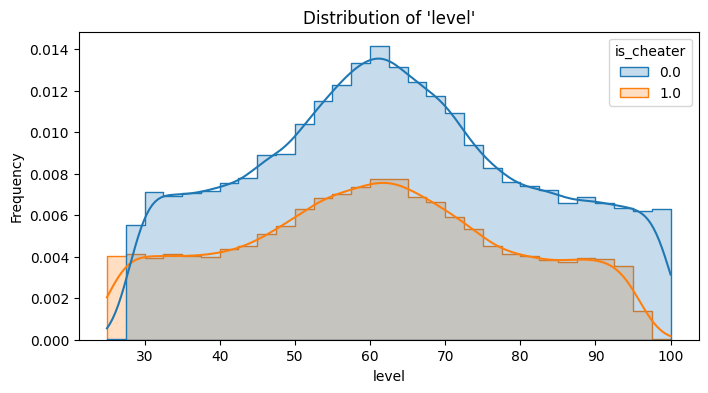

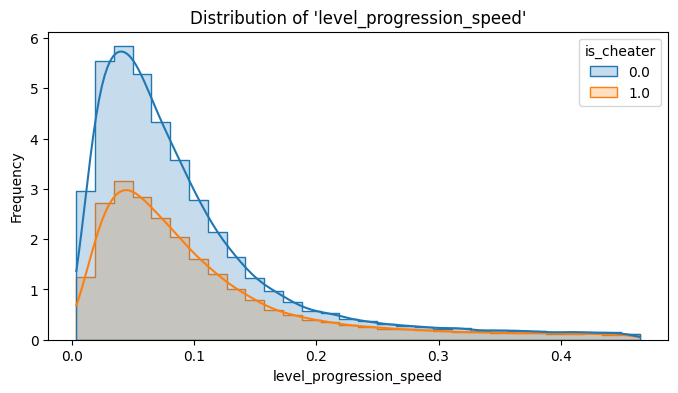

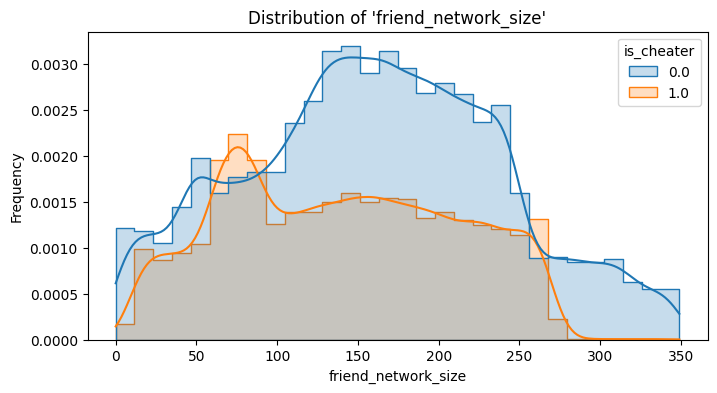

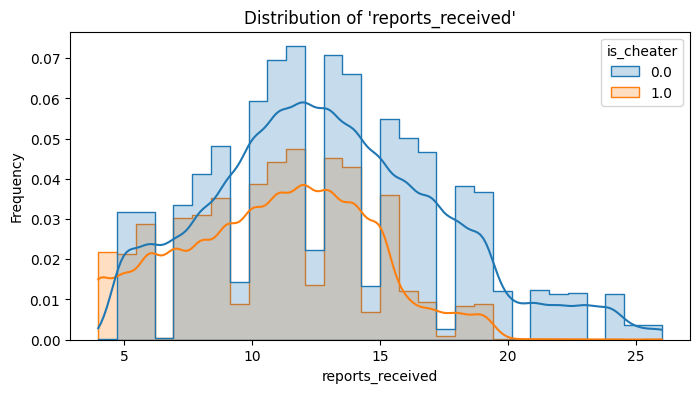

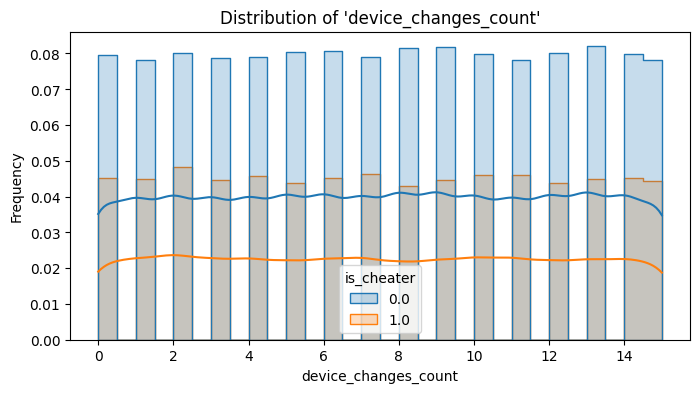

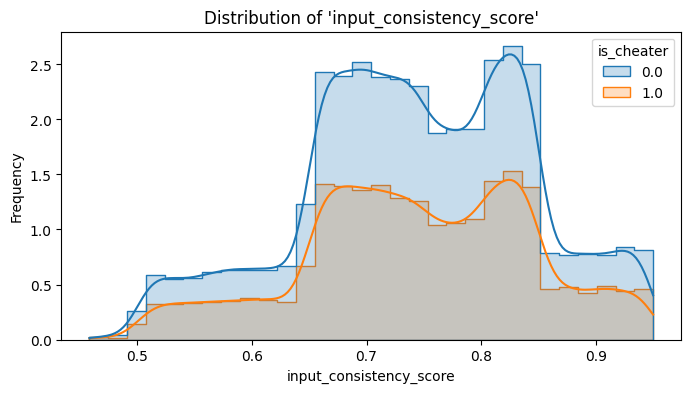

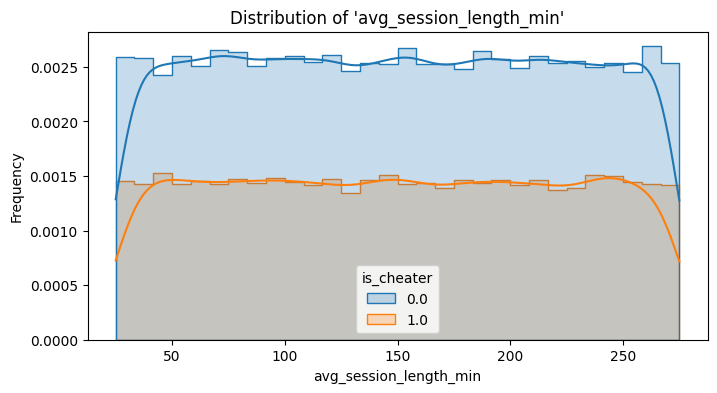

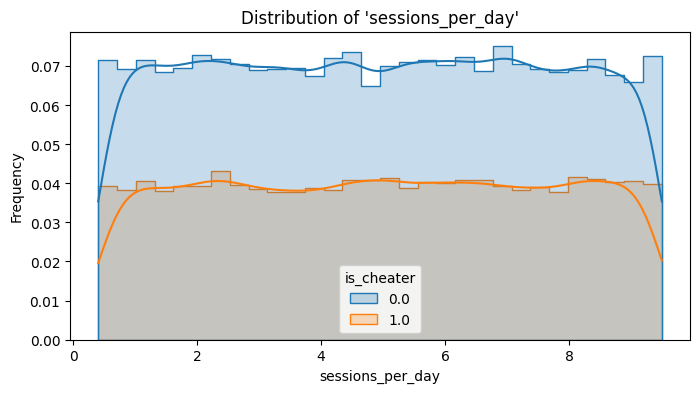

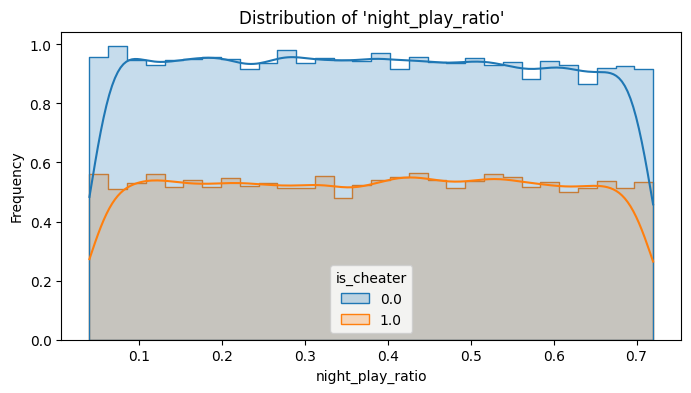

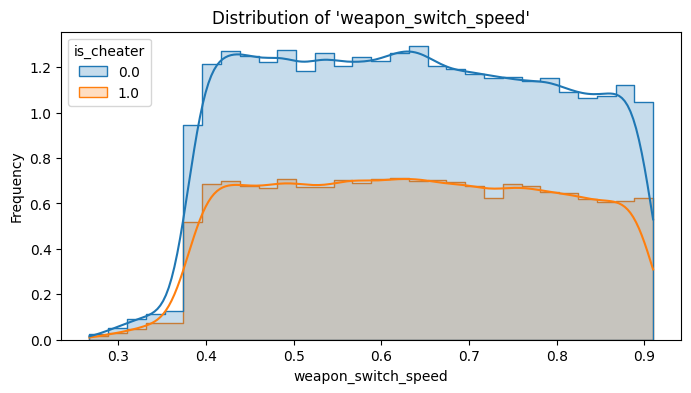

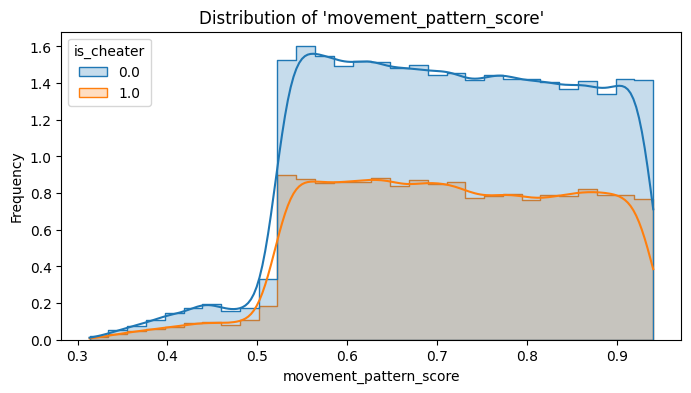

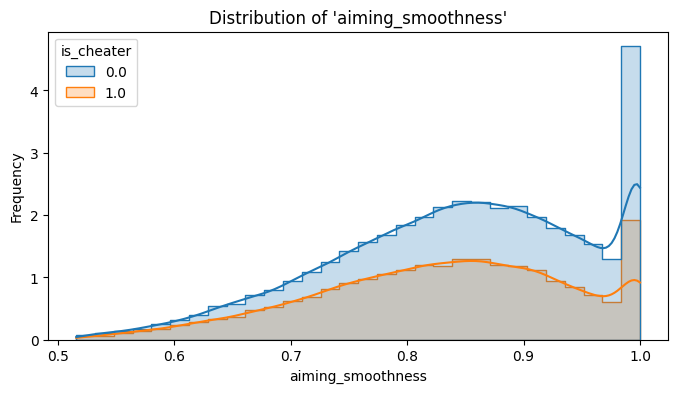

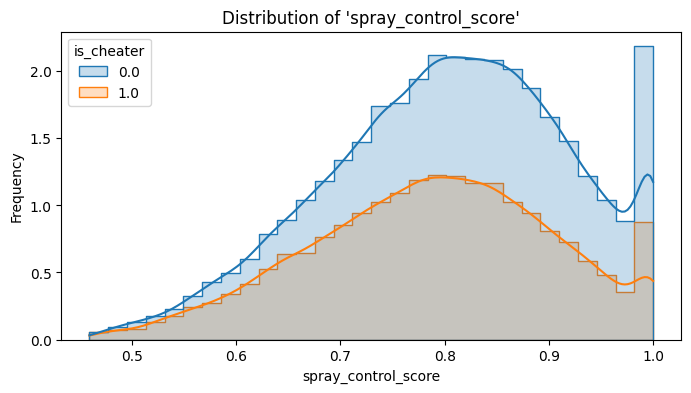

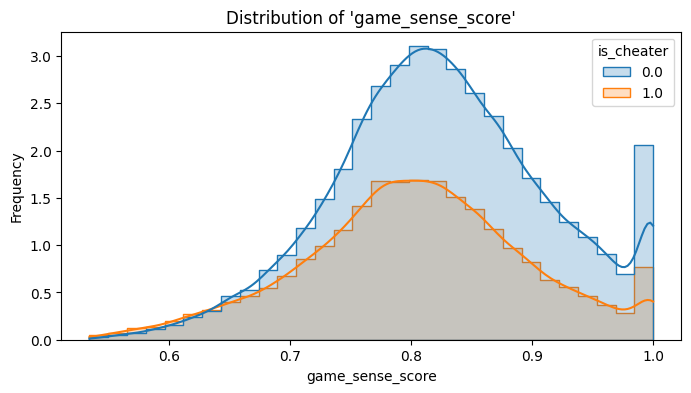

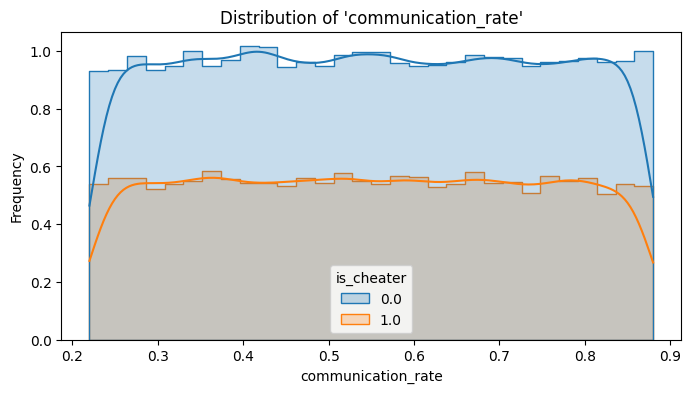

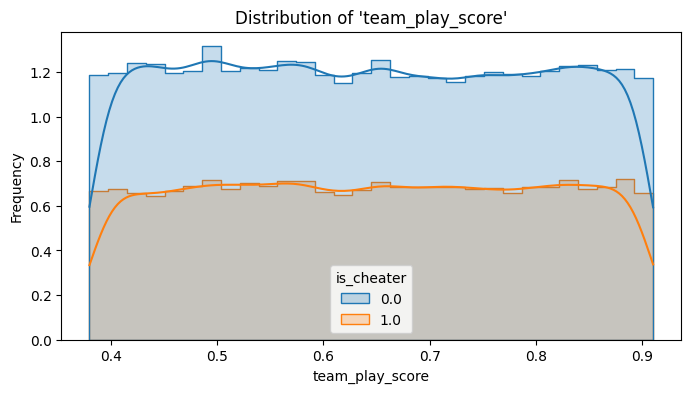

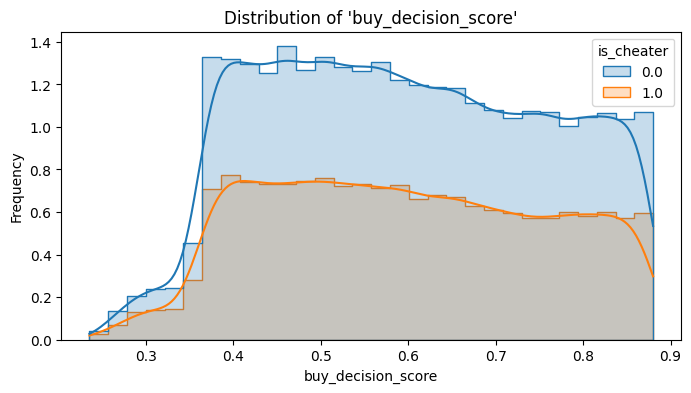

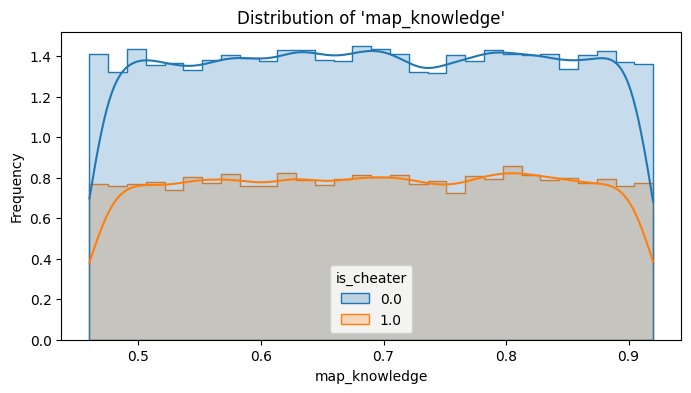

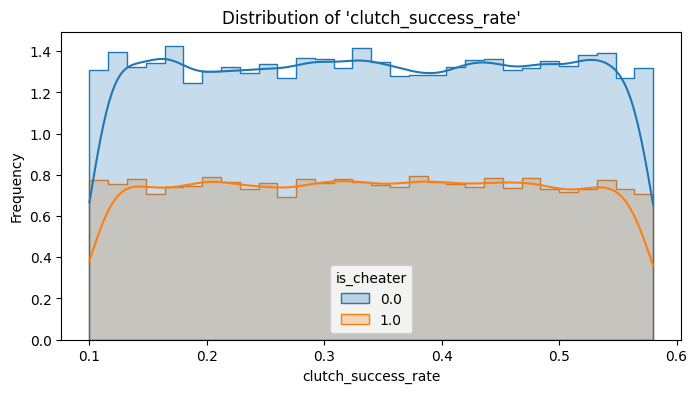

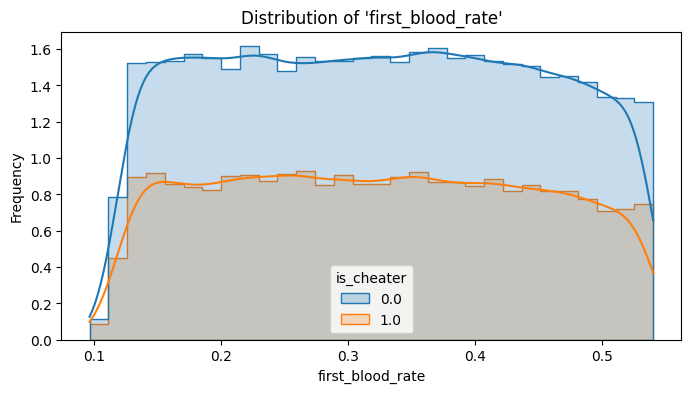

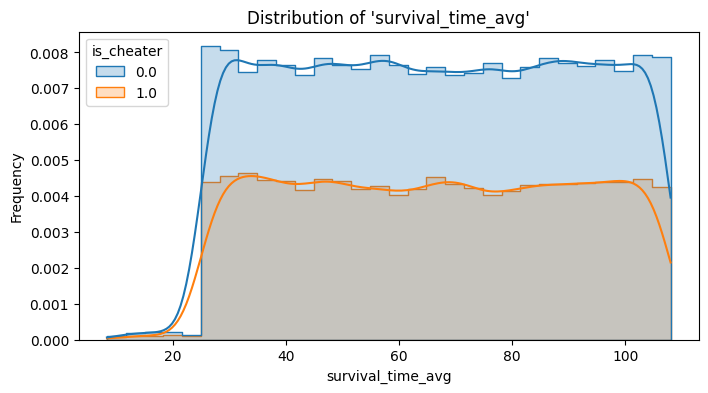

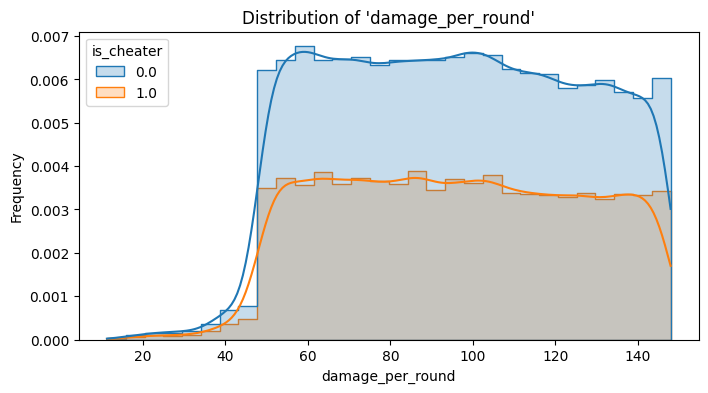

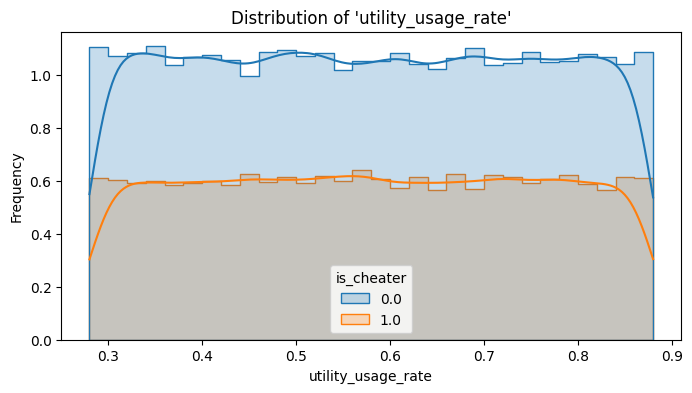

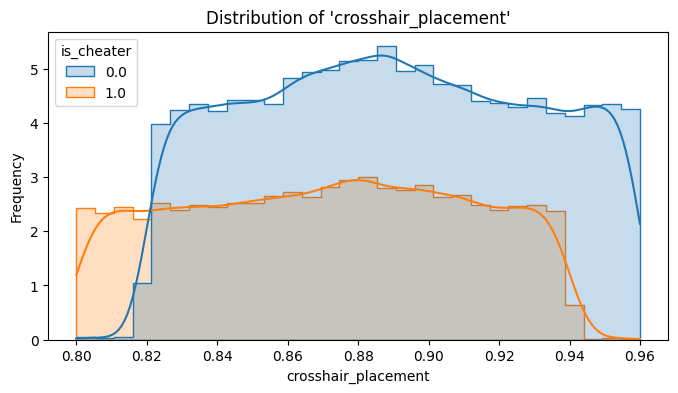

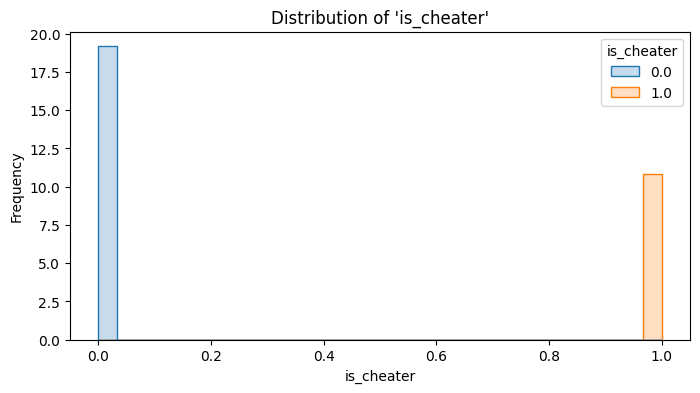

In [23]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='is_cheater', bins=30, kde=True, element="step", stat="density")
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

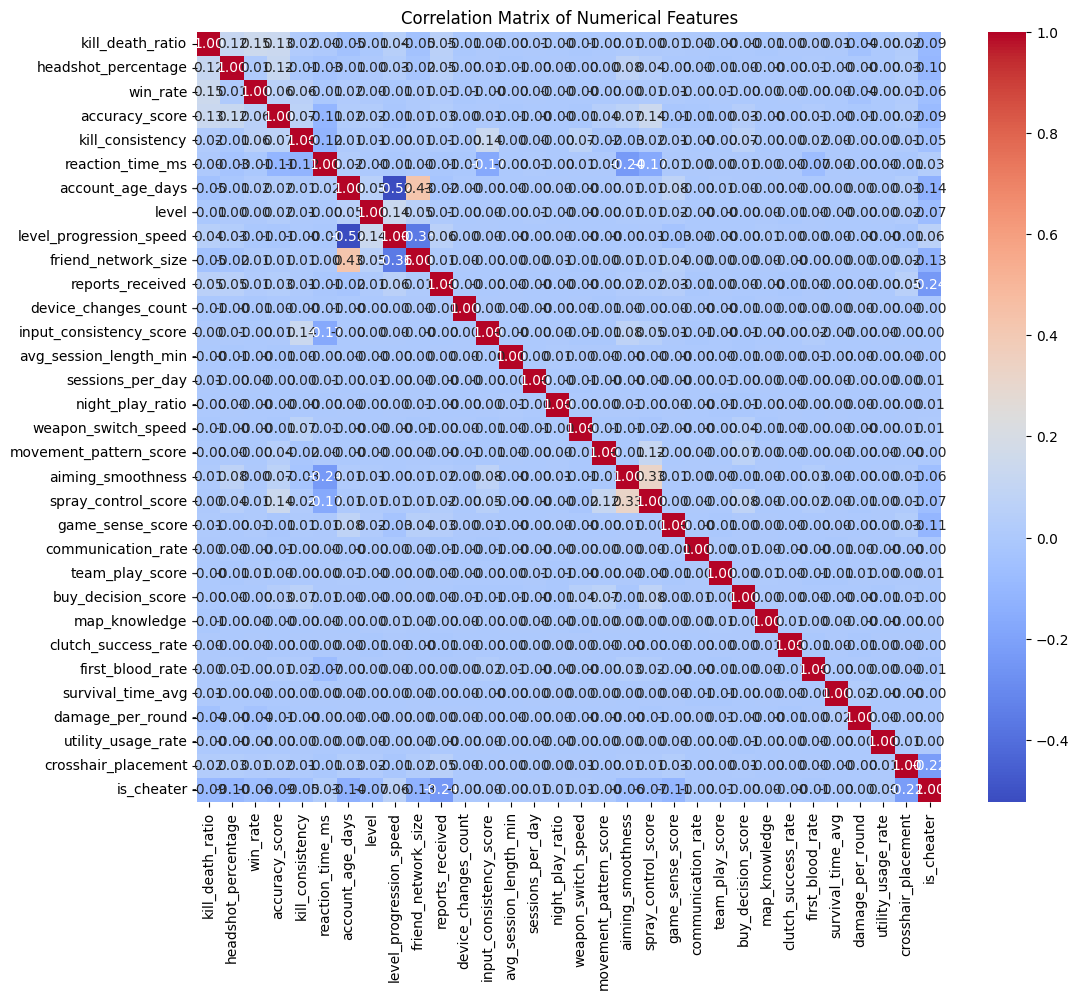

In [24]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_mat = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [25]:
# Top correlated features with 'is_cheater'
target_corr = corr_mat['is_cheater'].abs().sort_values(ascending=False)
print("Top correlated features with 'is_cheater':")
target_corr[1:16]

Top correlated features with 'is_cheater':


reports_received           0.238778
crosshair_placement        0.223507
account_age_days           0.135501
friend_network_size        0.126514
game_sense_score           0.109123
headshot_percentage        0.100871
kill_death_ratio           0.090947
accuracy_score             0.087387
level                      0.073666
spray_control_score        0.069410
aiming_smoothness          0.064125
level_progression_speed    0.061269
win_rate                   0.060399
kill_consistency           0.051134
reaction_time_ms           0.025668
Name: is_cheater, dtype: float64

In [26]:
target_corr[1:16].index.tolist()

['reports_received',
 'crosshair_placement',
 'account_age_days',
 'friend_network_size',
 'game_sense_score',
 'headshot_percentage',
 'kill_death_ratio',
 'accuracy_score',
 'level',
 'spray_control_score',
 'aiming_smoothness',
 'level_progression_speed',
 'win_rate',
 'kill_consistency',
 'reaction_time_ms']